<h1><b><u>Clinical Heart Failure Analysis</u></b></h1>

Heart Failure is a condition that occurs when the heart cannot pump enough blood and oxygen to support the other organs in your body. While it is a serious condition, it does not mean that the heart has stopped pumping.

Here are some interesting facts about Heart Failure, found on the cdc website (Link found [here](https://www.cdc.gov/heartdisease/heart_failure.htm)):

1) About 6.2 million adults in the United States have heart failure.1

2) In 2018, heart failure was mentioned on 379,800 death certificates (13.4%).1

3) Heart failure costs the nation an estimated $30.7 billion in 2012.2 This total includes the cost of health care services, medicines to treat heart failure, and missed days of work.

Heart Failure can be treated by any of the following methods:

1) Taking medicines

2) Reducing sodium in the diet

3) Drinking less liquids

4) Devices that remove excess salt and water from the blood

5) Heart transplant and other surgeries

6) Getting daily physical activity

In this Notebook, I am going to be doing some intermediate analysis of patients who have suffered from heart failure using a dataset provided from a clinical dataset found on the Kaggle platform. More information about the data and where it originates from can be found below.

<h2><b><u>About the Data</u></b></h2>

The data was uploaded to Kaggle from user <u>Aadarsh Velu</u>.

Below, is from the author:

<b><u> Context: </u></b>
    
This dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. 

<b><u>Attribute Information:</u></b>
    
<b>age:</b> age of the patient (years)
    
<b>anaemia:</b> decrease of red blood cells or hemoglobin (boolean)
    
<b>creatinine phosphokinase (CPK):</b> level of the CPK enzyme in the blood (mcg/L)
    
<b>diabetes:</b> if the patient has diabetes (boolean)
    
<b>ejection fraction:</b> percentage of blood leaving the heart at each contraction (percentage)
    
<b>high blood pressure:</b> if the patient has hypertension (boolean)
    
<b>platelets:</b> platelets in the blood (kiloplatelets/mL)
    
<b>sex:</b> woman or man (binary) 
    
<b>serum creatinine:</b> level of serum creatinine in the blood (mg/dL)
    
<b>serum sodium:</b> level of serum sodium in the blood (mEq/L)
    
<b>smoking:</b> if the patient smokes or not (boolean)
    
<b>time:</b> follow-up period (days)
    
<b>DEATH_EVENT</b>: if the patient died during the follow-up period (boolean) </i>
  
<b><u>Citation:</u></b>
    
Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.</i>

<h2><b><u>Libraries</u></b></h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

<h2><b><u>General Summary Statistics</u></b></h2>

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [4]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


<h2><b><u>Data Visualizations</u></b></h2>

Text(0.5, 1.0, 'Percentage of people who have passed since Follow-up Period')

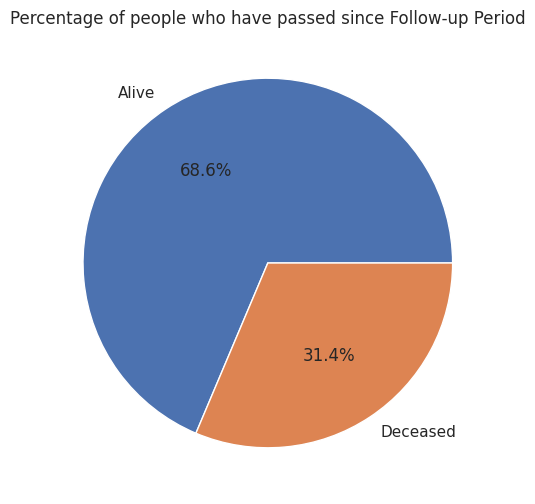

In [5]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 6))

labels = ['Alive','Deceased']

a, d = 0, 0

for i in data['DEATH_EVENT']:
    if i == 0:
        a += 1
    if i == 1:
        d += 1
        
slices = [a,d]

plt.pie(slices,labels=labels,autopct='%1.1f%%')

plt.title('Percentage of people who have passed since Follow-up Period')

Text(0.5, 1.0, 'Diagonal Correlation Matrix Heatmap')

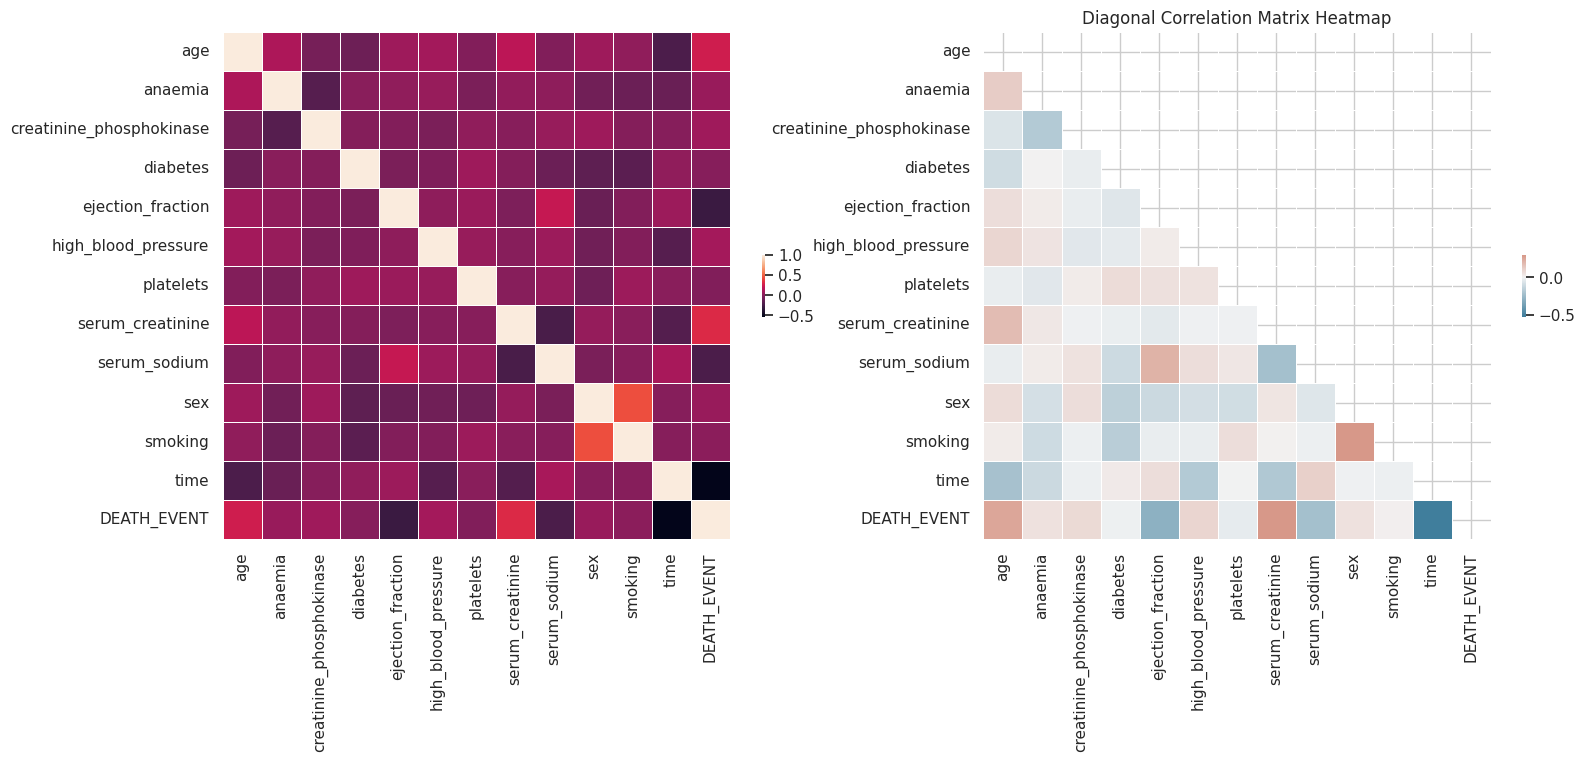

In [6]:
fig, axes = plt.subplots(1, 2,figsize=(18,8))

sns.heatmap(data.corr(),ax=axes[0],square=True,linewidths=.7,cbar_kws={"shrink": .10})

plt.title("Normal Correlation Matrix Heatmap")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .10},ax=axes[1])

plt.title("Diagonal Correlation Matrix Heatmap")

Text(0.5, 1.0, 'Ejection Fraction (percentage) (Kernel Density Plot)')

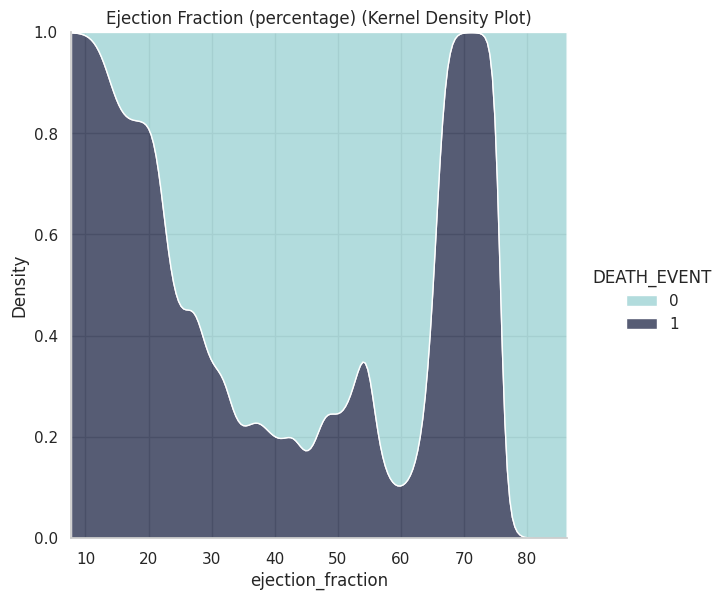

In [7]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=data,
    x="ejection_fraction",
    hue="DEATH_EVENT",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
)

plt.title("Ejection Fraction (percentage) (Kernel Density Plot)")

Text(0, 0.5, 'Count')

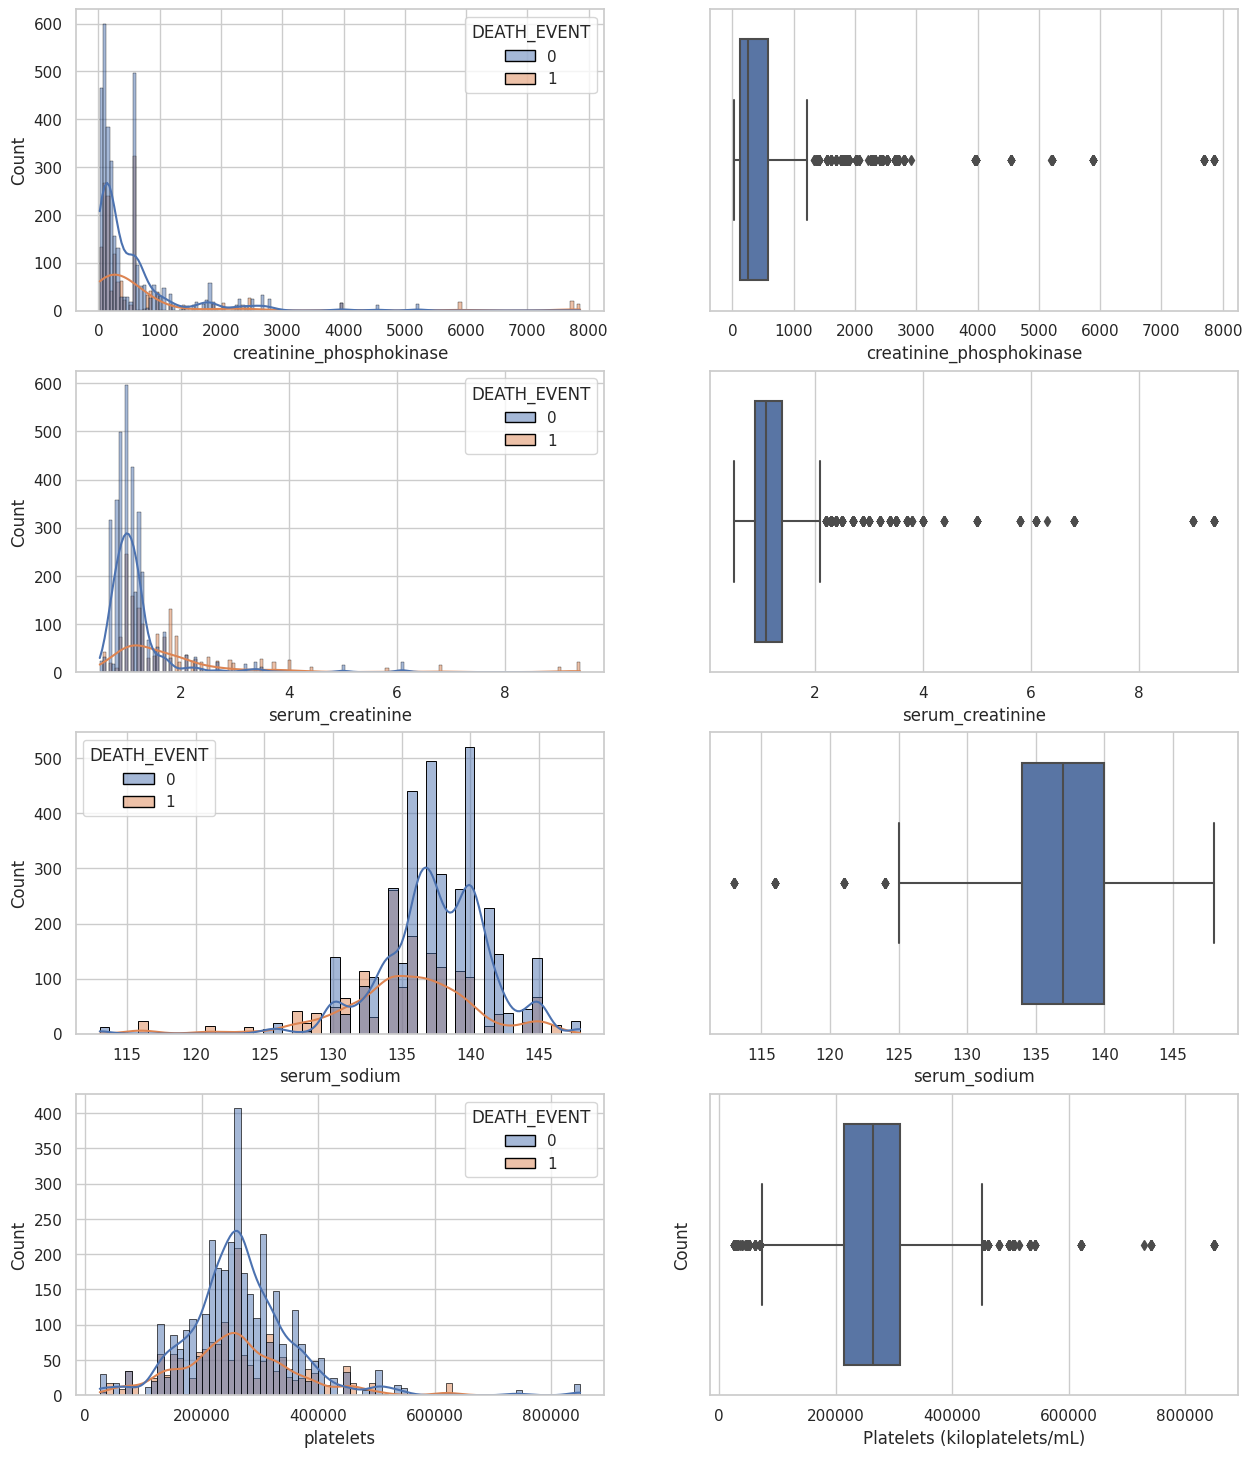

In [8]:
fig, axes = plt.subplots(4, 2,figsize=(15,18))

sns.histplot(data=data, x='creatinine_phosphokinase', hue="DEATH_EVENT", kde=True, edgecolor='black',ax=axes[0][0])
plt.xlabel('Creatinine_Phosphokinase (mcg/L)')
plt.ylabel('Count')

sns.boxplot(data=data, x='creatinine_phosphokinase', hue="DEATH_EVENT",ax=axes[0][1])
plt.xlabel('Creatinine_Phosphokinase (mcg/L)')
plt.ylabel('Count')

sns.histplot(data=data, x='serum_creatinine', hue="DEATH_EVENT", kde=True, edgecolor='black', ax=axes[1][0])
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Count')

sns.boxplot(data=data, x='serum_creatinine', hue="DEATH_EVENT",ax=axes[1][1])
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Count')

sns.histplot(data=data, x='serum_sodium', hue="DEATH_EVENT", kde=True, edgecolor='black',ax=axes[2][0])
plt.xlabel('Serum_Sodium (mEq/L)')
plt.ylabel('Count')

sns.boxplot(data=data, x='serum_sodium', hue="DEATH_EVENT",ax=axes[2][1])
plt.xlabel('Serum_Sodium (mEq/L)')
plt.ylabel('Count')

sns.histplot(data=data, x='platelets', hue="DEATH_EVENT", kde=True, edgecolor='black', ax=axes[3][0])
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.ylabel('Count')

sns.boxplot(data=data, x='platelets', hue="DEATH_EVENT",ax=axes[3][1])
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.ylabel('Count')

<h2><b><u>Building a Classification Model</u></b></h2>

<h3> Simple Logistic Regression Model using StatsModels.api </h3>

In [9]:
#Assigning the classes (y) and labels (X)
y = data['DEATH_EVENT'] 
X = data.drop(['DEATH_EVENT'],axis=1)

#Fitting the data to a logistic regression model
log_model = sm.Logit(y,sm.add_constant(X)).fit()

#Displaying the summary of the model
print(log_model.summary())
print('')

Optimization terminated successfully.
         Current function value: 0.360155
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 May 2024   Pseudo R-squ.:                  0.4209
Time:                        13:26:34   Log-Likelihood:                -1800.8
converged:                       True   LL-Null:                       -3109.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.3214      1.382      8.194      0.000       8.613

Printing the summary of our model reveals a few key things. 

1) There are a few values that have a p-value > 0.05, which means that we can reject the null hypothesis from anemia, diabetes, platelets, sex, and smoking. Rejection of the null hypothesis means that these variables were found to not be very correlated with a death event -- the variable we are trying to predict.

2) The Pseudo R-squared of model is .4209. Because R^2 does not exist for logistic regression models, we have a pseudo calculation that mimics what R^2 would normally tell us, except that it is adjusted for scoring between [0,1]. R^2 tells us the amount of variance that can be explained by the model

In the next lines below, I will create a confusion matrix as well as display the test accuracy of this model created

In [10]:
predictions = log_model.predict()
y_pred = []

for i in predictions:
    if i < 0.5:
        y_pred.append(0)
    if i >= 0.5:
        y_pred.append(1)

# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)
print('')
print(cm)

Test accuracy =  0.849

[[3121  311]
 [ 444 1124]]


([<matplotlib.patches.Wedge at 0x794b357288b0>,
 [Text(-0.9785334278861632, 0.502466248129519, 'Correct'),
  Text(0.9785333808418732, -0.5024663397464288, 'Incorrect')],
 [Text(-0.5337455061197253, 0.27407249897973757, '84.9%'),
  Text(0.5337454804592036, -0.27407254895259753, '15.1%')])

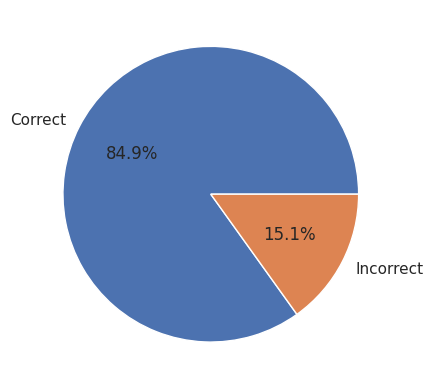

In [11]:
c = cm[0][0] + cm[1][1] #correct
ic = cm[0][1] + cm[1][0] #incorrect

plt.pie([c,ic],labels=['Correct','Incorrect'],autopct='%1.1f%%')

<Axes: >

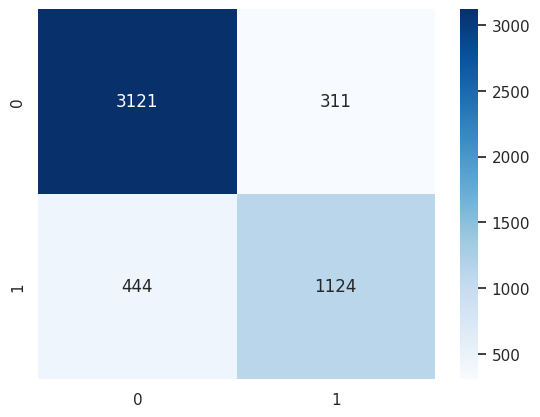

In [12]:
# confusion matrix 
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<h2> Takeaways from analyzing this dataset </h2> 

1) Age, Anaemia, creatinine_phosphokinase, high blood pressure, serum_creatinine, sex, and smoking were all variables that were positively correlated to a potential death taking place after a given amount of time from suffering from a previous heart failure event. The highest predictors of these listed variables, are having a history of high blood pressure and the amount of creatinine present in the blood.

2) diabetes, ejection_fraction, serum_sodium, and time, were all variables that were negatively correlated with the potential for a death taking place after a given amount of time from suffering from a previous heart failure event.

3) The current logistic regression model I am using has an 85.9% accuracy rate, however there is a lot of room for improvement to increase model accuracy